In [77]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(42)

# Parameters for the multi-layer network
num_layers = 2        # Number of layers (industries)
nodes_per_layer = 20  # Number of nodes (countries) per layer
mu, sigma = 50, 10    # Mean and std deviation for edge weights (normal distribution)
num_years = 30        # Simulating for 30 years

# Function to create the initial network
def create_initial_network():
    G = nx.DiGraph()

    for layer in range(num_layers):
        for i in range(nodes_per_layer):
            node_label = f"L{layer}_{chr(97 + i)}"  # 'a' to 't' for nodes
            G.add_node(node_label, layer=layer, economic_growth=1.0)  # Initialize growth as 1

        # Random edges and initial weights
        edges = nx.gnp_random_graph(nodes_per_layer, 0.05, directed=True)
        for u, v in edges.edges():
            weight = abs(np.random.normal(mu, sigma))  # Positive weights
            G.add_edge(f"L{layer}_{chr(97 + u)}", f"L{layer}_{chr(97 + v)}", weight=weight)

        # Random self-loops
        self_loop_nodes = np.random.choice(range(nodes_per_layer), size=int(nodes_per_layer * 0.3), replace=False)
        for i in self_loop_nodes:
            weight = abs(np.random.normal(mu, sigma))
            G.add_edge(f"L{layer}_{chr(97 + i)}", f"L{layer}_{chr(97 + i)}", weight=weight)

        # Cross-layer edges
        if layer < num_layers - 1:
            for i in range(nodes_per_layer):
                for j in range(nodes_per_layer):
                    weight = abs(np.random.normal(mu, sigma))
                    G.add_edge(f"L{layer}_{chr(97 + i)}", f"L{layer+1}_{chr(97 + j)}", weight=weight)

    return G

# Function to evolve the network over time (30 years)
def evolve_network(G, year):
    for node in G.nodes():
        # Simulate more gradual and rational economic growth
        current_growth = G.nodes[node]['economic_growth']
        # Use a linear growth model with slight fluctuation
        growth_rate = np.random.normal(0.02, 0.005)  # Mean growth 2%, fluctuation narrowed down
        new_growth = current_growth * (1 + growth_rate)  # Apply growth to node
        G.nodes[node]['economic_growth'] = new_growth

        # Modify edge weights based on the economic growth of connected nodes
        for neighbor in G.neighbors(node):
            weight = G[node][neighbor]['weight']
            growth_factor = (G.nodes[node]['economic_growth'] + G.nodes[neighbor]['economic_growth']) / 2
            G[node][neighbor]['weight'] = weight * (1 + 0.03 * growth_factor)  # Gradual weight increase (3%)

    # Optionally: Add/remove edges based on specific conditions (new trade policies, alliances)
    for u, v in list(G.edges()):
        if np.random.random() < 0.01:  # 1% chance to remove an edge every year
            G.remove_edge(u, v)
        elif np.random.random() < 0.03:  # 3% chance to add a new edge every year
            weight = abs(np.random.normal(mu, sigma))
            if not G.has_edge(u, v):
                G.add_edge(u, v, weight=weight)

    return G

# Initialize the network
G = create_initial_network()

# List to store IPR and centrality values over the years
ipr_values = []
centrality_data = {}

# Simulate the network evolution over 30 years
for year in range(1, num_years + 1):
    # Evolve the network for the year
    G = evolve_network(G, year)

    # Calculate eigenvector centrality
    eigen_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

    # Calculate IPR (Inverse Participation Ratio)
    centrality_values = np.array(list(eigen_centrality.values()))
    ipr = np.sum(centrality_values**4)  # Sum of the 4th power of the centralities
    ipr_values.append(ipr)

    # Store centrality values for each node
    for node, centrality in eigen_centrality.items():
        if node not in centrality_data:
            centrality_data[node] = []
        centrality_data[node].append(centrality)

# Create a DataFrame to store the results
ipr_df = pd.DataFrame({'Year': range(1, num_years + 1), 'IPR': ipr_values})
centrality_df = pd.DataFrame(centrality_data)
centrality_df['Year'] = range(1, num_years + 1)




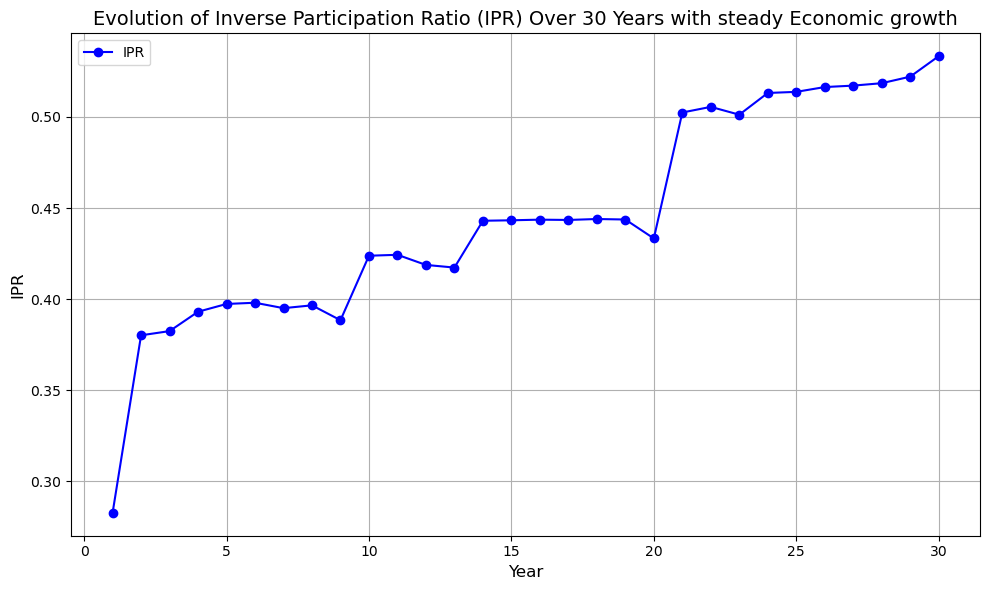

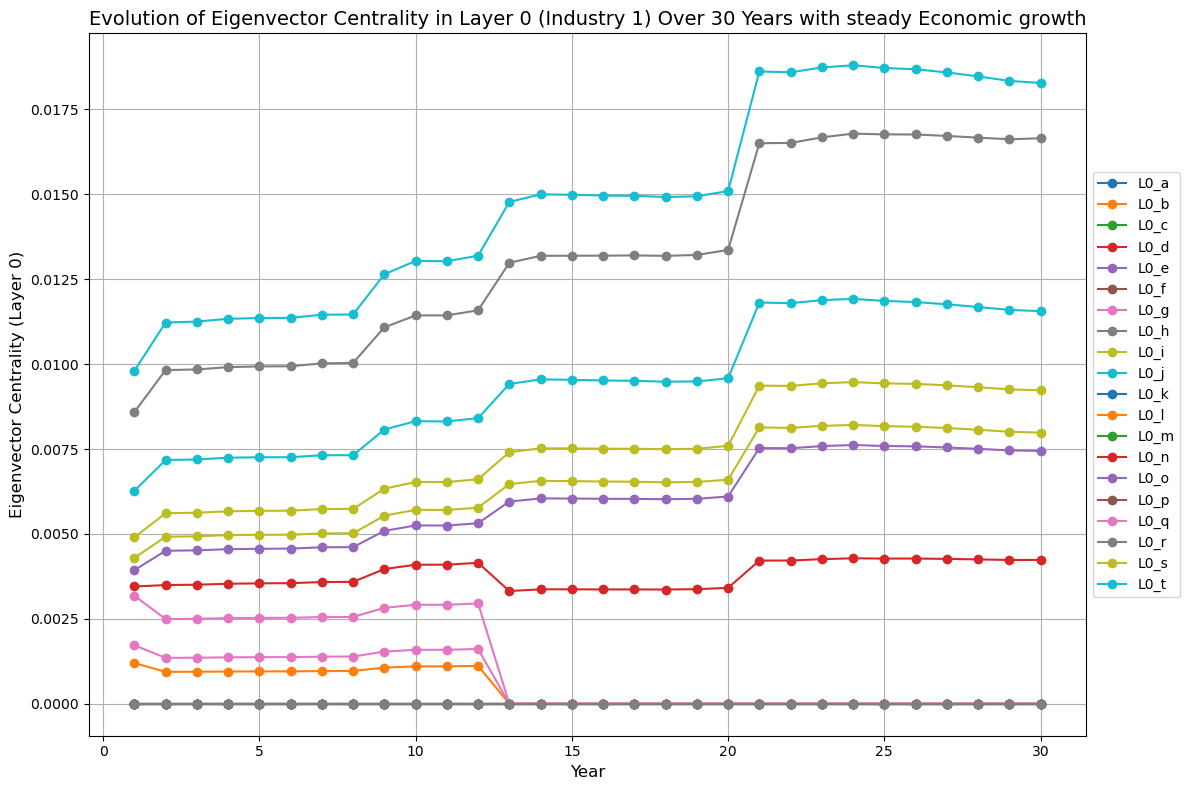

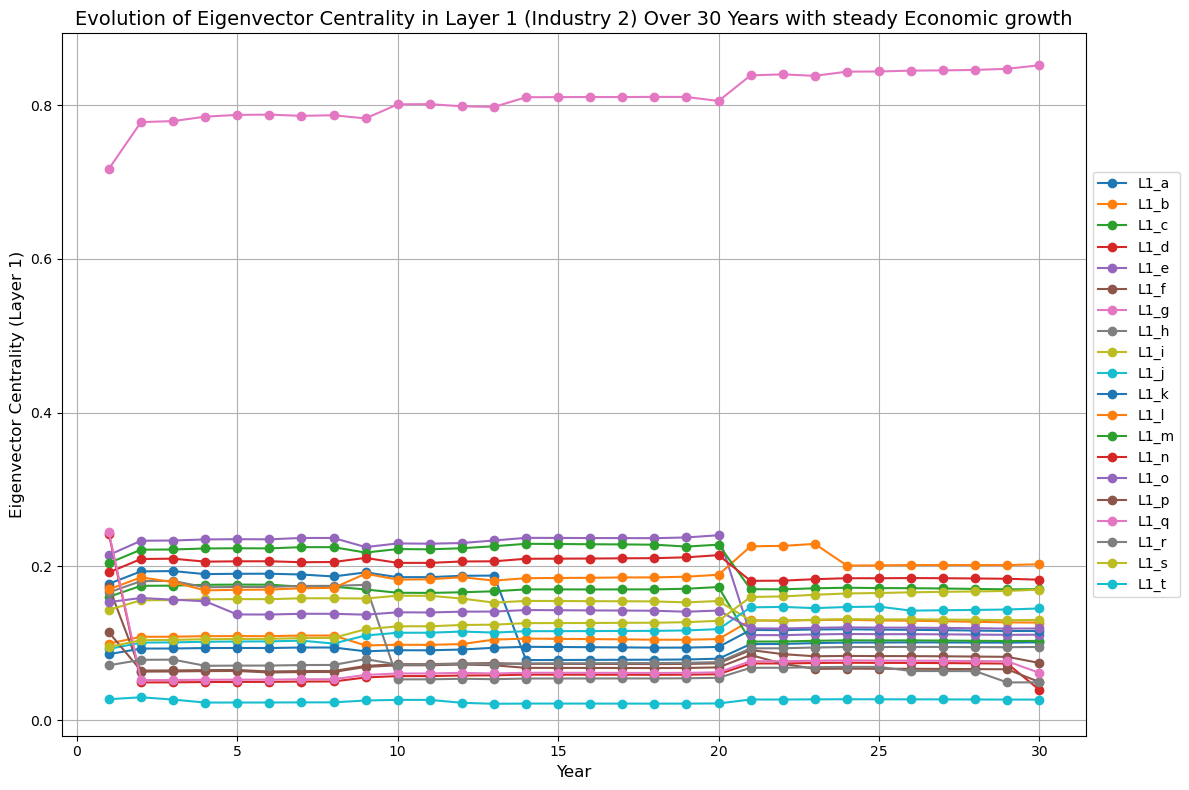

In [79]:
# Plotting IPR evolution over 30 years with smoother trend
plt.figure(figsize=(10, 6))
plt.plot(ipr_df['Year'], ipr_df['IPR'], marker='o', linestyle='-', color='b', label='IPR', markersize=6)
plt.xlabel('Year', fontsize=12)
plt.ylabel('IPR', fontsize=12)
plt.title('Evolution of Inverse Participation Ratio (IPR) Over 30 Years with steady Economic growth', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plotting centrality evolution for Layer 0 (Industry 1)
plt.figure(figsize=(12, 8))
layer_0_nodes = [node for node in centrality_df.columns[:-1] if node.startswith("L0")]
for node in layer_0_nodes:
    plt.plot(centrality_df['Year'], centrality_df[node], marker='o', linestyle='-', label=node, markersize=6)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Eigenvector Centrality (Layer 0)', fontsize=12)
plt.title('Evolution of Eigenvector Centrality in Layer 0 (Industry 1) Over 30 Years with steady Economic growth', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting centrality evolution for Layer 1 (Industry 2)
plt.figure(figsize=(12, 8))
layer_1_nodes = [node for node in centrality_df.columns[:-1] if node.startswith("L1")]
for node in layer_1_nodes:
    plt.plot(centrality_df['Year'], centrality_df[node], marker='o', linestyle='-', label=node, markersize=6)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Eigenvector Centrality (Layer 1)', fontsize=12)
plt.title('Evolution of Eigenvector Centrality in Layer 1 (Industry 2) Over 30 Years with steady Economic growth', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()